# Exploración de filtros espaciales y morfológicos en escenarios reales

## Operaciones de filtrado espacial disponibles
- Filtros paso Alto -> Resaltan variaciones bruscas de intensidad 
    - Derivada de primer orden. Produce bordes mas gruesos en la imagen resultante (detalles finos)
    - Derivada de segundo orden. Produce bordes mas finos (Cambios en escalon)
    
    (De esto no estoy seguro)
    Esto funciona como el analisis de funciones en matematicas, la primera derivada es la pendiente y la segunda los maximos y los minimos, osea la primera derivada resalta las zonas donde el valor de la intensidad esta cambiando hacia cualquier direccion y la segunda derivada resalta los bordes si a parte de haber cambios de intensidad en los pixeles de alrededor estos pixeles cambian con diferentes intensidades.

- Filtros paso bajo -> Suavizado de la imagen, atenuan las variaciones bruscas de intensidad
- Filtros de deteccion de bordes. Basado en el calculo de gradiente 
    - Operador de Roberts
    - Operadores de Prewitt 
    - Operadores de Sobel
    - Algoritmo de Canny (De los mas efectivos).

## Configuracion del codigo,  carga de las imagenes y funciones basicas para comparar

In [120]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

print ("Bibliotecas importadas correctamente")

imagenes_rgb = [
    cv2.imread('barco1.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco2.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco3.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco4.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco5.jpg', cv2.IMREAD_COLOR)
]

print ("Imagenes Cargadas en color")

imagenes_grey = [
    cv2.imread('barco1.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco2.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco3.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco4.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco5.jpg',  cv2.IMREAD_GRAYSCALE),
]

print ("Imagenes Cargadas en b&n")




Bibliotecas importadas correctamente
Imagenes Cargadas en color
Imagenes Cargadas en b&n


In [121]:
def mostrar_imagen(imagen, titulo):
    # Convertir la imagen de BGR (OpenCV) a RGB (Matplotlib)
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(imagen_rgb)
    plt.title(titulo)
    plt.axis('off')
    plt.show()
    
def comparar_imagenes(imagen1, titulo1, imagen2, titulo2):

    imagen1_rgb = cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB)
    imagen2_rgb = cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1) 
    plt.imshow(imagen1_rgb)
    plt.title(titulo1)
    plt.axis('off')
        
    plt.subplot(1, 2, 2) 
    plt.imshow(imagen2_rgb)
    plt.title(titulo2)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def comparar_tres_imagenes(imagen1, titulo1, imagen2, titulo2, imagen3, titulo3):

    # Convertir las imágenes de BGR a RGB para Matplotlib
    imagen1_rgb = cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB)
    imagen2_rgb = cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB)
    imagen3_rgb = cv2.cvtColor(imagen3, cv2.COLOR_BGR2RGB)
    
    # Crear la figura
    plt.figure(figsize=(18, 6))  # Ajustar tamaño para que entren las tres imágenes
    
    # Mostrar la primera imagen
    plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, posición 1
    plt.imshow(imagen1_rgb)
    plt.title(titulo1)
    plt.axis('off')
    
    # Mostrar la segunda imagen
    plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, posición 2
    plt.imshow(imagen2_rgb)
    plt.title(titulo2)
    plt.axis('off')
    
    # Mostrar la tercera imagen
    plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, posición 3
    plt.imshow(imagen3_rgb)
    plt.title(titulo3)
    plt.axis('off')
    
    # Mostrar el resultado
    plt.tight_layout()
    plt.show()


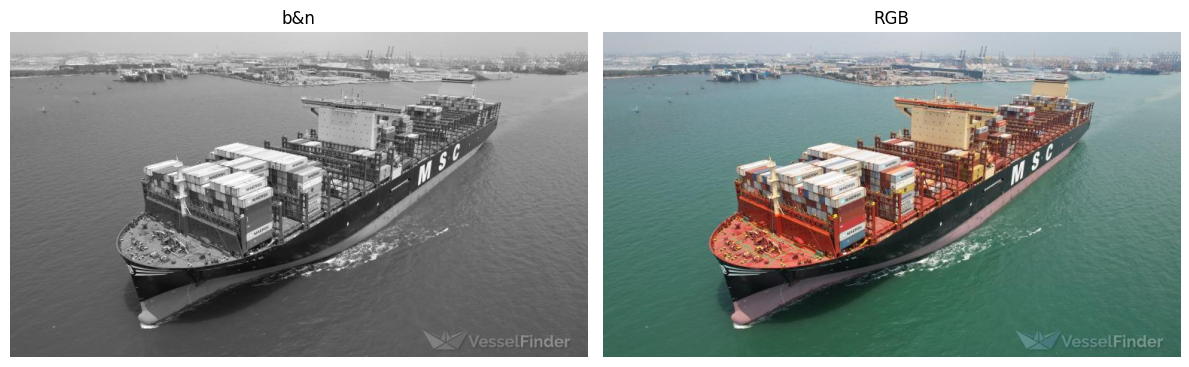

In [122]:
## Comprobar que las imagenes estam bien cargadas
comparar_imagenes(imagenes_grey[0],"b&n",imagenes_rgb[0], "RGB")

Filtro pasa bajas para suavizar la imagen y eliminar los pequeños cambios de contraste, con esto buscamos que no se detecten los bordes de los contenedores, naves industriales de fondo y demas objetos irrelevantes. 
<br>
Tamaño de kernel > filtrado mas potente a mas tamaño de kernel, esto tambien se puede hacer con el sigma en el gaussiano<br>
Kernel Gaussiano > Da mas peso a los puntos centrales del kernes, conserva mejor los detalles mientras reduce el riudo<br>

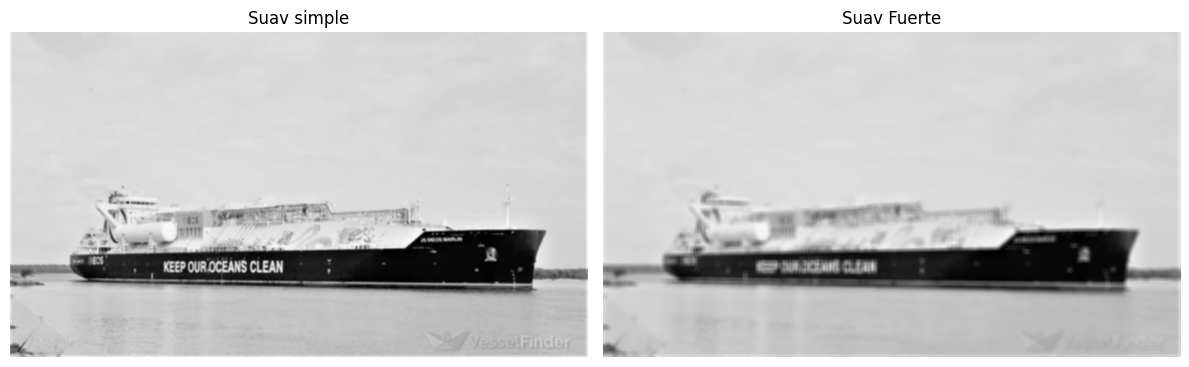

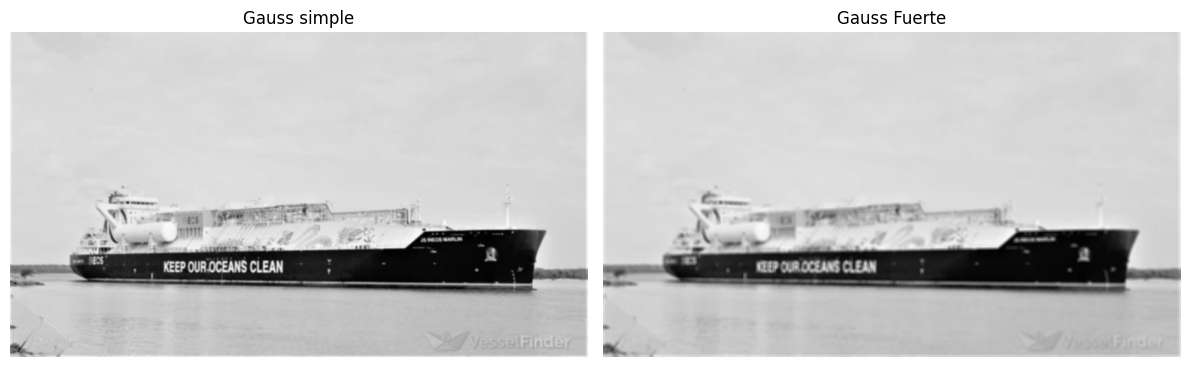

In [123]:
# Función para aplicar el filtro pasabaja
def aplicar_filtro_pasabaja(imagen, kernel):
    """
    Aplica un filtro pasabaja a la imagen usando un kernel proporcionado.

    :param imagen: Imagen de entrada (en escala de grises).
    :param kernel: Kernel para el filtro.
    :return: Imagen filtrada.
    """
    imagen_filtrada = cv2.filter2D(imagen, -1, kernel)
    return imagen_filtrada

# Definición de kernels pasabaja
kernels_pasabaja = {
    "suavizado_simple": np.ones((3, 3), dtype=np.float32) / 9,  # Kernel promedio simple 3x3
    "suavizado_mas_potente": np.ones((7, 7), dtype=np.float32) / 49,  # Kernel promedio 5x5 (más potente)
    "gaussiano_debil": cv2.getGaussianKernel(3, 1).dot(cv2.getGaussianKernel(3, 1).T),  # Gaussiano 3x3, sigma=1
    "gaussiano_fuerte": cv2.getGaussianKernel(5, 3).dot(cv2.getGaussianKernel(5, 3).T),  # Gaussiano 5x5, sigma=1.5
}


# Lista para almacenar las imágenes procesadas
imagenesSuavizadas = []
imagenProcesar = 3

# Iterar sobre los kernels y las imágenes
i = 0
for nombre_kernel, kernel in kernels_pasabaja.items():
    # Asegurarse de que no exceda el número de imágenes disponibles
    if i < len(imagenes_grey):
        imagen_filtrada = aplicar_filtro_pasabaja(imagenes_grey[imagenProcesar], kernel)
        imagenesSuavizadas.append(imagen_filtrada)  # Agregar la imagen filtrada a la lista
        i += 1

# Comparar imágenes
comparar_imagenes(imagenesSuavizadas[0], "Suav simple", imagenesSuavizadas[1], "Suav Fuerte")
comparar_imagenes(imagenesSuavizadas[2], "Gauss simple", imagenesSuavizadas[3], "Gauss Fuerte")



Una vez hecho esto se van a implementar los algoritmos de deteccion de bordes para ver cual funciona mejor 

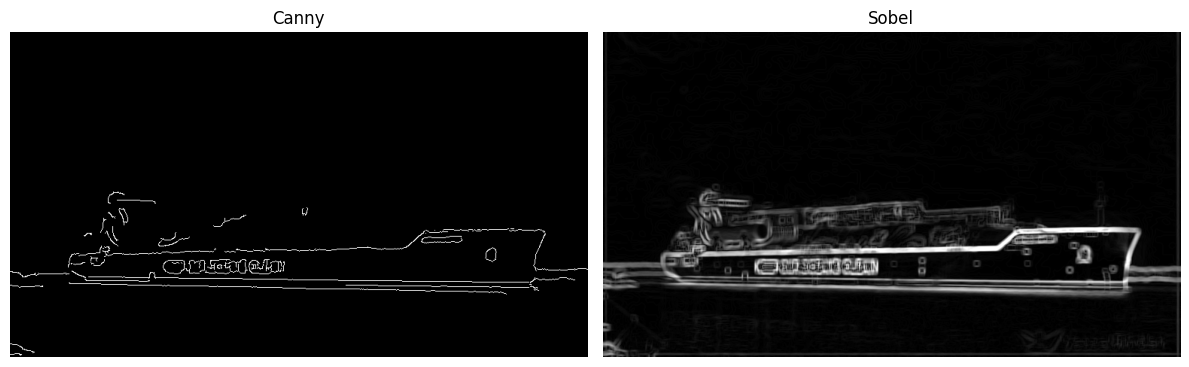

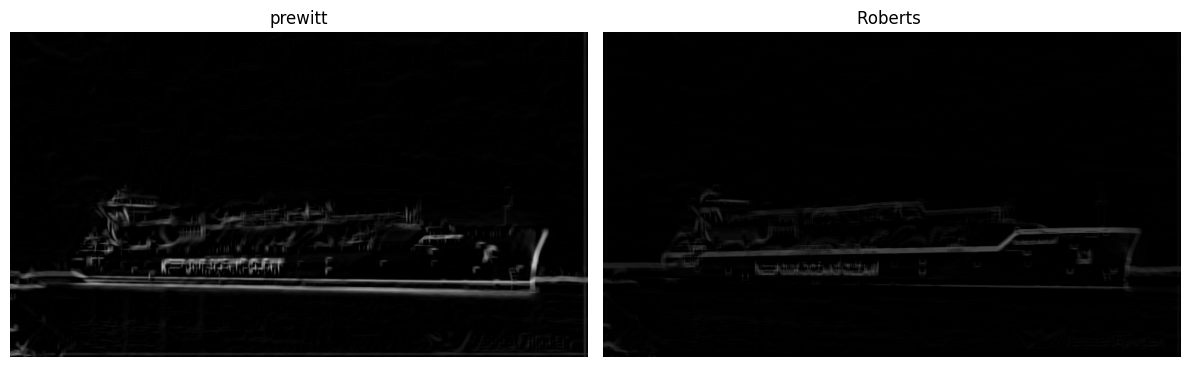

In [124]:

def deteccion_canny(imagen):
    """
    Aplica la detección de bordes Canny a una imagen.
    
    :param imagen: Imagen de entrada (en escala de grises).
    :return: Imagen binaria con bordes detectados.
    """
    # Suavizado para reducir el ruido
    imagen_suavizada = cv2.GaussianBlur(imagen, (5, 5), 1)
    # Detección de bordes Canny con umbrales predefinidos
    bordes_canny = cv2.Canny(imagen_suavizada, 50, 150)
    return bordes_canny

def deteccion_sobel(imagen):
    """
    Aplica la detección de bordes Sobel a una imagen.
    
    :param imagen: Imagen de entrada (en escala de grises).
    :return: Imagen con la magnitud del gradiente.
    """
    # Gradientes en X e Y
    gradiente_x = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=3)  # Derivada en X
    gradiente_y = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=3)  # Derivada en Y
    # Magnitud del gradiente
    magnitud_gradiente = cv2.magnitude(gradiente_x, gradiente_y)
    # Normalización a rango [0, 255] para visualización
    magnitud_gradiente = cv2.convertScaleAbs(magnitud_gradiente)
    return magnitud_gradiente


def deteccion_prewitt(imagen):
    # Asegurarse de que la imagen está en escala de grises
    if len(imagen.shape) == 3:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    kernel_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    
    gradiente_x = cv2.filter2D(imagen, -1, kernel_prewitt_x)
    gradiente_y = cv2.filter2D(imagen, -1, kernel_prewitt_y)
    
    # Asegurarse de que ambos gradientes tienen el mismo tipo y tamaño
    gradiente_x = gradiente_x.astype(np.float32)
    gradiente_y = gradiente_y.astype(np.float32)
    
    magnitud_gradiente = cv2.magnitude(gradiente_x, gradiente_y)
    magnitud_gradiente = cv2.convertScaleAbs(magnitud_gradiente)
    
    return magnitud_gradiente



def deteccion_roberts(imagen):
    # Asegurarse de que la imagen está en escala de grises
    if len(imagen.shape) == 3:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    kernel_roberts_x = np.array([[1.5, 0], [0, -1.5]])
    kernel_roberts_y = np.array([[0, 1.5], [-1.5, 0]])
    
    gradiente_x = cv2.filter2D(imagen, -1, kernel_roberts_x)
    gradiente_y = cv2.filter2D(imagen, -1, kernel_roberts_y)
    
    # Asegurarse de que ambos gradientes tienen el mismo tipo y tamaño
    gradiente_x = gradiente_x.astype(np.float32)
    gradiente_y = gradiente_y.astype(np.float32)
    
    magnitud_gradiente = cv2.magnitude(gradiente_x, gradiente_y)
    magnitud_gradiente = cv2.convertScaleAbs(magnitud_gradiente)
    
    return magnitud_gradiente


imagenes_bordes = []

imagenes_bordes.append(deteccion_canny(imagenesSuavizadas[1]))
imagenes_bordes.append(deteccion_sobel(imagenesSuavizadas[1]))     # Agregar los bordes Sobel
imagenes_bordes.append(deteccion_prewitt(imagenesSuavizadas[1]))   # Agregar los bordes Prewitt
imagenes_bordes.append(deteccion_roberts(imagenesSuavizadas[1]))

comparar_imagenes(imagenes_bordes[0], "Canny", imagenes_bordes[1], "Sobel")
comparar_imagenes(imagenes_bordes[2], "prewitt", imagenes_bordes[3], "Roberts ")


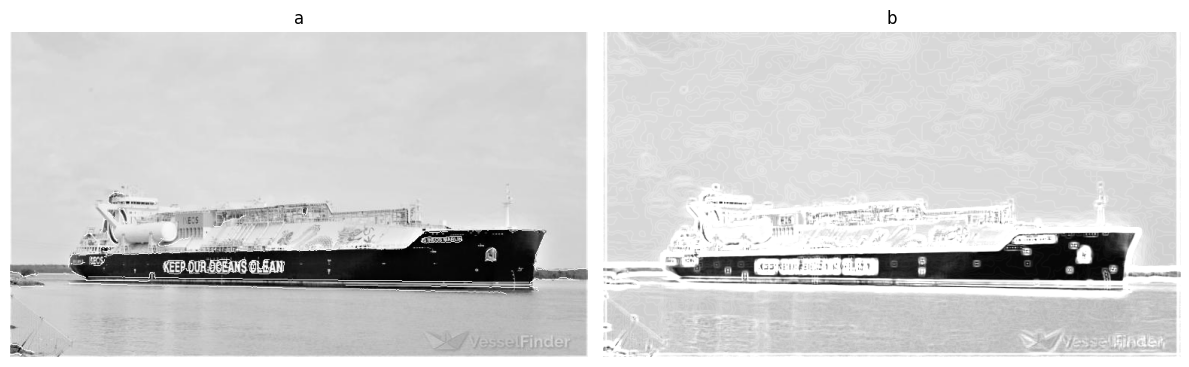

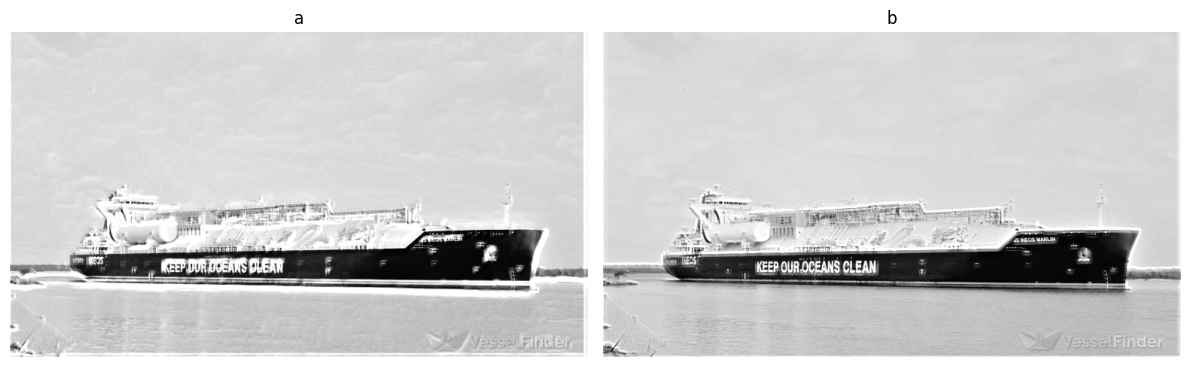

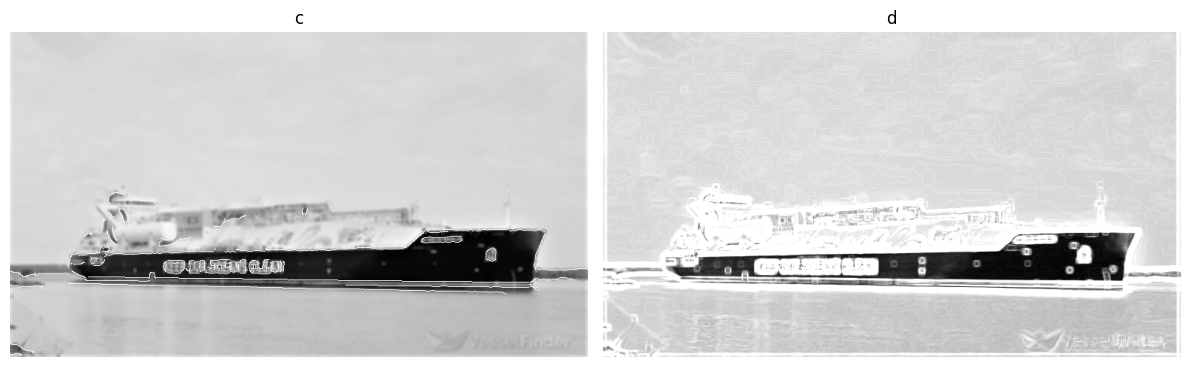

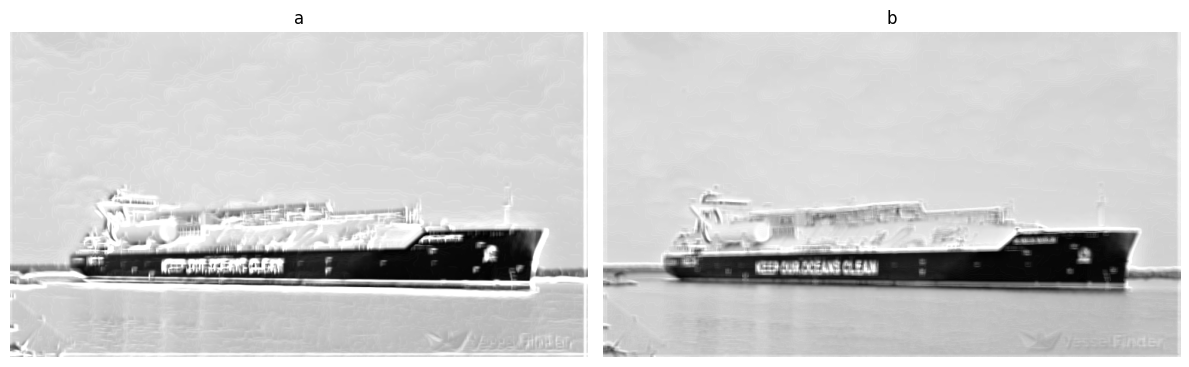

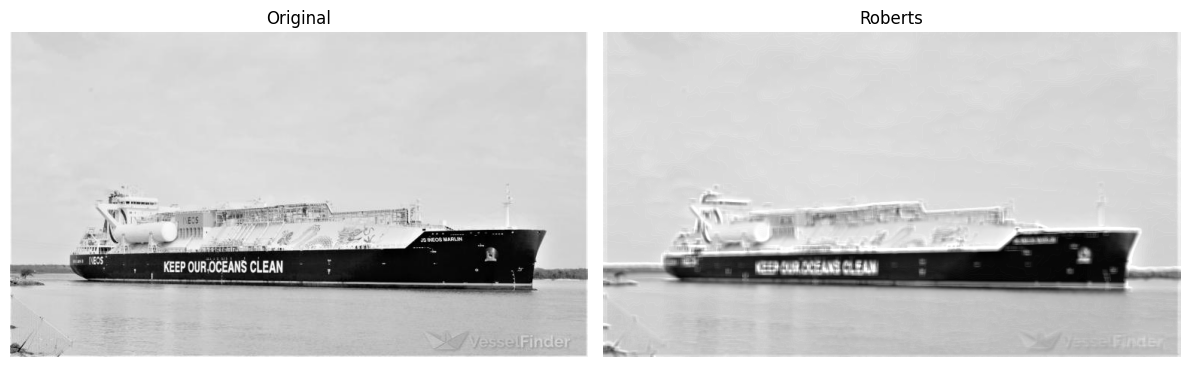

In [125]:

def resaltar_bordes(imagen, bordes):
    # Asegurarse de que la imagen esté en escala de grises
    if len(imagen.shape) == 3:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Normalizar la imagen de bordes (asegurarse de que los bordes estén en [0, 255])
    bordes_normalizados = cv2.convertScaleAbs(bordes)
    
    # Asegurarse de que la imagen original y los bordes tengan el mismo tamaño
    if imagen.shape != bordes_normalizados.shape:
        raise ValueError("Las imágenes deben tener el mismo tamaño")
    
    # Multiplicar los bordes por un factor para resaltar más
    bordes_resaltados = cv2.addWeighted(imagen, 1, bordes_normalizados, 2, 0)
    
    return bordes_resaltados

imagenes_resaltadas = []
imagenes_suavizadas_resaltadas = []

for img in imagenes_bordes: 
    imagenes_resaltadas.append(resaltar_bordes(imagenes_grey[imagenProcesar],img))
    imagenes_suavizadas_resaltadas.append(resaltar_bordes(imagenesSuavizadas[3],img))
    
comparar_imagenes(imagenes_resaltadas[0], "a", imagenes_resaltadas[1], "b")
comparar_imagenes(imagenes_resaltadas[2], "a", imagenes_resaltadas[3], "b")

comparar_imagenes(imagenes_suavizadas_resaltadas[0], "c", imagenes_suavizadas_resaltadas[1], "d")
comparar_imagenes(imagenes_suavizadas_resaltadas[2], "a", imagenes_suavizadas_resaltadas[3], "b")


comparar_imagenes(imagenes_grey[imagenProcesar], "Original", imagenes_suavizadas_resaltadas[3], "Roberts")



In [144]:
"""
Tipo de suavizado
    - 0 Suavizado leve
    - 1 Suavizado fuerte
    - 2 Suavizado Gaussiano leve 
    - 3 Suavizado Gaussiano fuerte
    
Tipo de deteccion de bordes
    - 0 Canny 
    - 1 Sobel 
    - 2 Prewitt
    - 3 Roberts
    
Color 
    - False  Se opera sobre las imagenes de en escala de grises
    - True  Se opera sobre las imagenes de en capas RGB
        
Tipo reconstruccion
    - 0 Se suman los bordes sobre la imagen original
    - 1 Se suman los bordes sobre la imagen con el suavizado seleccionado

"""


def pipeline_mejora(color = False,tipo_suavizado = 0, tipo_deteccion_bordes = 3,  tipo_reconstruccion = 1): 
    imagenes_rgb = [
    cv2.imread('barco1.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco2.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco3.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco4.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco5.jpg', cv2.IMREAD_COLOR)
    ]

    imagenes_grey = [
    cv2.imread('barco1.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco2.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco3.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco4.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco5.jpg',  cv2.IMREAD_GRAYSCALE),
    ]
    imagenes = []
    # Controlar parametro color
    if (color):
        imagenes = imagenes_rgb 
    else:
        imagenes = imagenes_grey
        
    
    #Suavizar la imagenes 
    imagenes_s = []
    
    #Kernels disponibles 
    kernels_pasabaja = [
     np.ones((3, 3), dtype=np.float32) / 9,  # Kernel promedio simple 3x3
     np.ones((7, 7), dtype=np.float32) / 49,  # Kernel promedio 5x5 (más potente)
     cv2.getGaussianKernel(3, 1).dot(cv2.getGaussianKernel(3, 1).T),  # Gaussiano 3x3, sigma=1
     cv2.getGaussianKernel(5, 3).dot(cv2.getGaussianKernel(5, 3).T),  # Gaussiano 5x5, sigma=1.5
    ]
    
    if (tipo_suavizado < 0 or tipo_suavizado > len(kernels_pasabaja)-1): 
        print ("Tipo de suavizado incorrecto")
    else: 
        for img in imagenes: 
            imagenes_s.append(aplicar_filtro_pasabaja(imagen=img, kernel= kernels_pasabaja[tipo_suavizado]))
            
    
    imagen_b = []   
    #Detectar bordes
    match tipo_deteccion_bordes: 
        case 0: 
            for img in imagenes_s: 
                imagen_b.append(deteccion_canny(img))
        case 1: 
            for img in imagenes_s: 
                imagen_b.append(deteccion_sobel(img))
        case 2: 
            for img in imagenes_s: 
                imagen_b.append(deteccion_sobel(img))
        case 3: 
            for img in imagenes_s: 
                imagen_b.append(deteccion_prewitt(img))
        case 4: 
            for img in imagenes_s: 
                imagen_b.append(deteccion_roberts(img))
        case _: 
            print ("tipo de deteccion de bordes no valido")       
    
    imagen_mejorada = []
    match tipo_reconstruccion: 
        case 0: 
            for i in range(0,len(imagenes): 
                imagen_mejorada.append(resaltar_bordes(img, br))      
        case 1: 
            for img,br in imagenes_s, imagen_b: 
                imagen_mejorada.append(resaltar_bordes(img, br))        
                      
    return imagen_mejorada

imga = pipeline_mejora()
mostrar_imagen(imga[0], "a")
    

ValueError: too many values to unpack (expected 2)